In [1]:
import csv2dict, pickle
import plotUtil

from projectUtil import *


## instantiate atmosphere, aircraft, mdp classes
atmosphere = ISA()

# aircraft class: (mass [kg], eta, idleFuelCons [kg/s], minSpeed [m/s], maxSpeed [m/s])
b737 = aircraft(55000., 0.33, 600./3600, [90, 80, 70, 65], [150, 115, 100, 90])
b747 = aircraft(350000., 0.33, 1500./3600, [100, 90, 80, 70], [150, 130, 110, 90])

# approachMDP class: (atmosphere, aircraft, initialState, finalState)
initState = (11000, 105, 0, 250000) # (altitude(m), velocity(m/s), configuration, distance(m)) 
FAFState = (1000, 70, 3) # (altitude(m), velocity(m/s), configuration)
mdp737 = ApproachMDP(atmosphere, b737, initState, FAFState)

## import real aircraft trajectories
csv = csv2dict.csvImport('adsb-data/logs') # generate the class
try:
    csv.readcsvs() # actually import the data
except:
    print('Failed to import aircraft trajectories.')

## load computed policy:
with open('policy737cruise1000vi', 'rb') as f:
    vi737 = pickle.load(f)

Computing optimal approach...
Change in action noticed from retract to accel at distance 149000
Change in action noticed from accel to retract at distance 148000
Change in action noticed from retract to accel at distance 147000
Change in action noticed from accel to descend at distance 143000
Change in action noticed from descend to decel at distance 11000
Change in action noticed from decel to extend at distance 7000
Change in action noticed from extend to decel at distance 6000
Change in action noticed from decel to extend at distance 4000
Change in action noticed from extend to decel at distance 3000
Plotting reference trajectories...
Fuel used by the aircraft: 202.012639036 kg
Final configuration: speed: 70, altitude: 1000, config: 3, dist: 0


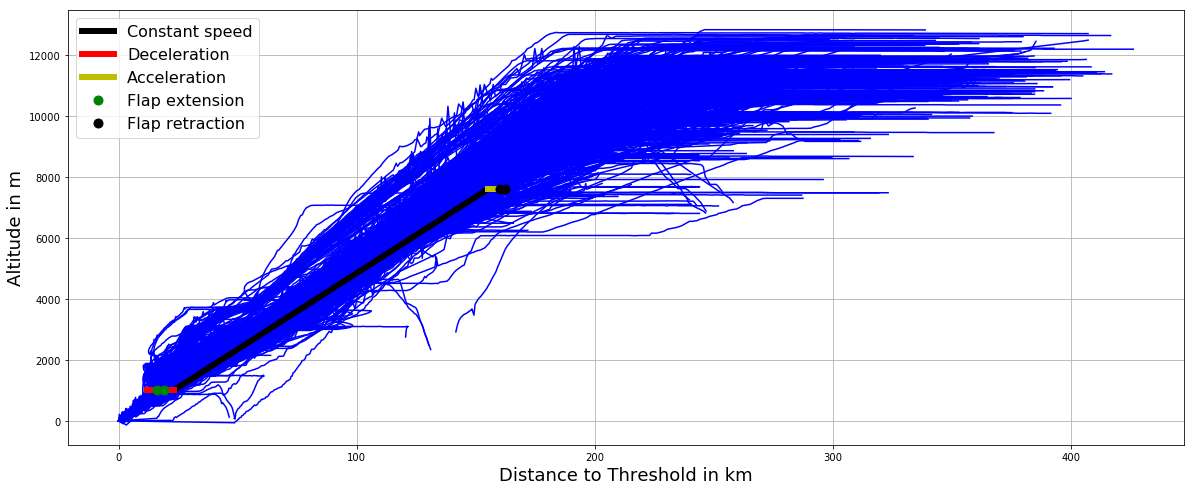

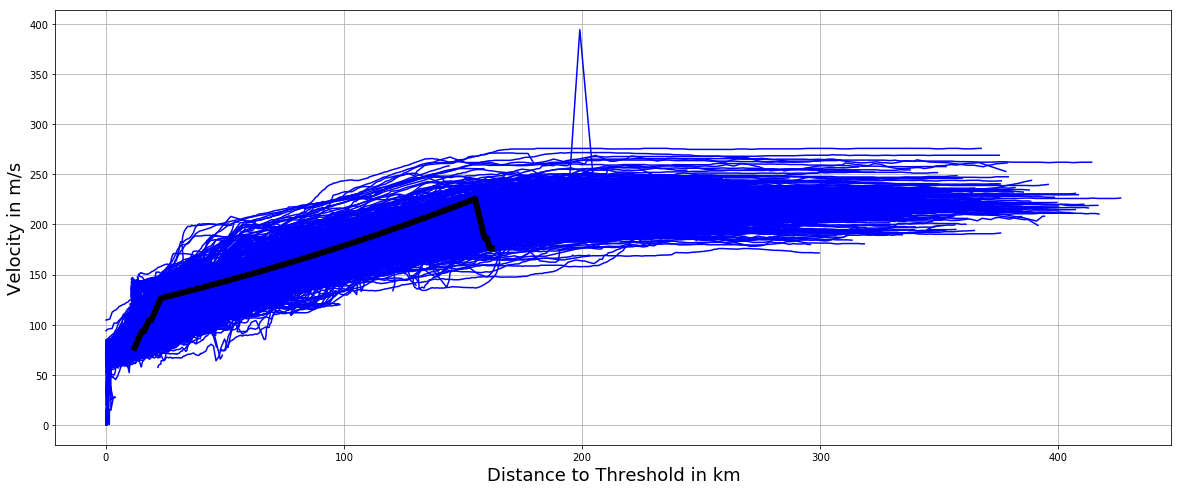

In [2]:
## Where does the approach start?
altitude = 7600  # altitude in meter (1 ft = 0.3048 m) [choose integer between 1000 and 10000]
speed = 90       # speed in m / s (1 mph = 0.45 m / s)  [choose integer between 70 and 150]
config = 3       # flap setting [choose between 0 and 3]
distance = 150   # distance from the FAF in km (1 mile = 1.609 km) [choose even integer between 50 and 200]

# plot results!
plotUtil.plotTrajectory(mdp737, vi737, csv, (altitude, speed, config, distance*1000), figSize=(20,8))